In [4]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext("local", "pyspark-shell")

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Exploratory Data Analysis

## Where to Begin

One of the most important aspects of applied machine learning is feature engineering. It is the process of using domain knowledge to create new features to help our models perform better.

Parquet data is columnar so it is organized by columns. It is fast to read in only the data you need. CSVs, on the other hand, have to read and parse the whole data set to read a single field. Parquet fields are defined and typed. Since it is not delimited by character, it is great for messy text data.

### Check Version

In [5]:
print(spark.version)

import sys
print(sys.version_info)

3.1.2
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


### Load in the data

Since the parquet data was not provided, csv file and schema of the data were used. I tried to write a parquet file with the schema provided, but failed somehow.

In [ ]:
# from urllib.request import urlretrieve
# url = "https://assets.datacamp.com/production/repositories/1704/datasets/d26c25f46746882d0a0f474cc6709c629f69872c/2017_StPaul_MN_Real_Estate.csv"
# data = urlretrieve(url, "Real_Estate.csv")

In [6]:
from pyspark.sql.types import StructField, StructType, LongType, StringType, DoubleType
a = StructType([StructField("NO",LongType(),True),StructField("MLSID",StringType(),True),StructField("STREETNUMBERNUMERIC",LongType(),True),StructField("STREETADDRESS",StringType(),True),StructField("STREETNAME",StringType(),True),StructField("POSTALCODE",LongType(),True),StructField("STATEORPROVINCE",StringType(),True),StructField("CITY",StringType(),True),StructField("SALESCLOSEPRICE",LongType(),True),StructField("LISTDATE",StringType(),True),StructField("LISTPRICE",LongType(),True),StructField("LISTTYPE",StringType(),True),StructField("ORIGINALLISTPRICE",LongType(),True),StructField("PRICEPERTSFT",DoubleType(),True),StructField("FOUNDATIONSIZE",LongType(),True),StructField("FENCE",StringType(),True),StructField("MAPLETTER",StringType(),True),StructField("LOTSIZEDIMENSIONS",StringType(),True),StructField("SCHOOLDISTRICTNUMBER",StringType(),True),StructField("DAYSONMARKET",LongType(),True),StructField("OFFMARKETDATE",StringType(),True),StructField("FIREPLACES",LongType(),True),StructField("ROOMAREA4",StringType(),True),StructField("ROOMTYPE",StringType(),True),StructField("ROOF",StringType(),True),StructField("ROOMFLOOR4",StringType(),True),StructField("POTENTIALSHORTSALE",StringType(),True),StructField("POOLDESCRIPTION",StringType(),True),StructField("PDOM",LongType(),True),StructField("GARAGEDESCRIPTION",StringType(),True),StructField("SQFTABOVEGROUND",LongType(),True),StructField("TAXES",LongType(),True),StructField("ROOMFLOOR1",StringType(),True),StructField("ROOMAREA1",StringType(),True),StructField("TAXWITHASSESSMENTS",DoubleType(),True),StructField("TAXYEAR",LongType(),True),StructField("LIVINGAREA",LongType(),True),StructField("UNITNUMBER",StringType(),True),StructField("YEARBUILT",LongType(),True),StructField("ZONING",StringType(),True),StructField("STYLE",StringType(),True),StructField("ACRES",DoubleType(),True),StructField("COOLINGDESCRIPTION",StringType(),True),StructField("APPLIANCES",StringType(),True),StructField("BACKONMARKETDATE",DoubleType(),True),StructField("ROOMFAMILYCHAR",StringType(),True),StructField("ROOMAREA3",StringType(),True),StructField("EXTERIOR",StringType(),True),StructField("ROOMFLOOR3",StringType(),True),StructField("ROOMFLOOR2",StringType(),True),StructField("ROOMAREA2",StringType(),True),StructField("DININGROOMDESCRIPTION",StringType(),True),StructField("BASEMENT",StringType(),True),StructField("BATHSFULL",LongType(),True),StructField("BATHSHALF",LongType(),True),StructField("BATHQUARTER",LongType(),True),StructField("BATHSTHREEQUARTER",DoubleType(),True),StructField("CLASS",StringType(),True),StructField("BATHSTOTAL",LongType(),True),StructField("BATHDESC",StringType(),True),StructField("ROOMAREA5",StringType(),True),StructField("ROOMFLOOR5",StringType(),True),StructField("ROOMAREA6",StringType(),True),StructField("ROOMFLOOR6",StringType(),True),StructField("ROOMAREA7",StringType(),True),StructField("ROOMFLOOR7",StringType(),True),StructField("ROOMAREA8",StringType(),True),StructField("ROOMFLOOR8",StringType(),True),StructField("BEDROOMS",LongType(),True),StructField("SQFTBELOWGROUND",LongType(),True),StructField("ASSUMABLEMORTGAGE",StringType(),True),StructField("ASSOCIATIONFEE",LongType(),True),StructField("ASSESSMENTPENDING",StringType(),True),StructField("ASSESSEDVALUATION",DoubleType(),True)])

In [10]:
df = spark.read.csv("Real_Estate.csv", header=True, schema=a)
print(df.columns)

['NO', 'MLSID', 'STREETNUMBERNUMERIC', 'STREETADDRESS', 'STREETNAME', 'POSTALCODE', 'STATEORPROVINCE', 'CITY', 'SALESCLOSEPRICE', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'ORIGINALLISTPRICE', 'PRICEPERTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MAPLETTER', 'LOTSIZEDIMENSIONS', 'SCHOOLDISTRICTNUMBER', 'DAYSONMARKET', 'OFFMARKETDATE', 'FIREPLACES', 'ROOMAREA4', 'ROOMTYPE', 'ROOF', 'ROOMFLOOR4', 'POTENTIALSHORTSALE', 'POOLDESCRIPTION', 'PDOM', 'GARAGEDESCRIPTION', 'SQFTABOVEGROUND', 'TAXES', 'ROOMFLOOR1', 'ROOMAREA1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'COOLINGDESCRIPTION', 'APPLIANCES', 'BACKONMARKETDATE', 'ROOMFAMILYCHAR', 'ROOMAREA3', 'EXTERIOR', 'ROOMFLOOR3', 'ROOMFLOOR2', 'ROOMAREA2', 'DININGROOMDESCRIPTION', 'BASEMENT', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'CLASS', 'BATHSTOTAL', 'BATHDESC', 'ROOMAREA5', 'ROOMFLOOR5', 'ROOMAREA6', 'ROOMFLOOR6', 'ROOMAREA7', 'ROOMFLOOR7', 'ROOMAREA8', 'ROOMFLOOR8', 'BEDROOM

## Defining A Problem

The selling price of a house will be predicted. Given is listed price and features how much to buy the house for? 

First you need to know limitaions of the data. Since the data have a small geographical area, applying the models to new areas poses serious risk. It only contains residential data, so can not predict how much a business location is worth. Since it is one year's worth of data it is hard to draw strong conclustions about seasonality in this dataset. 

When Parquet is used, it set the data types for all of the fieds which is a huge advantage over CSV.

### What are we predicting?

In [19]:
Y_df = df.select("SALESCLOSEPRICE")
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



### Verifying Data Load

In [20]:
def check_load(df, num_records, num_columns):
    message = "Validation Failed"
    if num_records == df.count():
        if num_columns == len(df.columns):
            message = "Validation Passed"
    return message

print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes

In [24]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'ASSESSEDVALUATION': 'double',
 'ASSOCIATIONFEE': 'bigint',
 'ASSUMABLEMORTGAGE': 'string',
 'SQFTBELOWGROUND': 'bigint'}

actual_dtypes_list = df.dtypes
print(actual_dtypes_list)
print()
for attribute_tuple in actual_dtypes_list:
    col_name = attribute_tuple[0]
    
    if col_name in validation_dict:
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + " has expected dtype.")
    

[('NO', 'bigint'), ('MLSID', 'string'), ('STREETNUMBERNUMERIC', 'bigint'), ('STREETADDRESS', 'string'), ('STREETNAME', 'string'), ('POSTALCODE', 'bigint'), ('STATEORPROVINCE', 'string'), ('CITY', 'string'), ('SALESCLOSEPRICE', 'bigint'), ('LISTDATE', 'string'), ('LISTPRICE', 'bigint'), ('LISTTYPE', 'string'), ('ORIGINALLISTPRICE', 'bigint'), ('PRICEPERTSFT', 'double'), ('FOUNDATIONSIZE', 'bigint'), ('FENCE', 'string'), ('MAPLETTER', 'string'), ('LOTSIZEDIMENSIONS', 'string'), ('SCHOOLDISTRICTNUMBER', 'string'), ('DAYSONMARKET', 'bigint'), ('OFFMARKETDATE', 'string'), ('FIREPLACES', 'bigint'), ('ROOMAREA4', 'string'), ('ROOMTYPE', 'string'), ('ROOF', 'string'), ('ROOMFLOOR4', 'string'), ('POTENTIALSHORTSALE', 'string'), ('POOLDESCRIPTION', 'string'), ('PDOM', 'bigint'), ('GARAGEDESCRIPTION', 'string'), ('SQFTABOVEGROUND', 'bigint'), ('TAXES', 'bigint'), ('ROOMFLOOR1', 'string'), ('ROOMAREA1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'bigint'), ('LIVINGAREA', 'bigint'), (

## Visually Inspecting Data / EDA

Mean function is considered an aggregate function and it needs to be passed to the agg method along with the column to ru it on as a dictionary.

Covariance is a function that shows variables vary together. It takes to numeric columns and returns a value. 

An excellent way to explore a data is through statistical plotting. We can plot data using non-Spark libraries like Seaborn but they require converting pySpark DataFrame to a Pandas DataFrame. Large datasets can cause Pandas to crash. The sample funtion can help us get a smaller dataset to plot.

You can use Seaborn's distplot to show distribution of variables.

lmplot can show if there is a linear relationship between two variables.

### Using Corr()

In [32]:
columns = ['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'PDOM',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BACKONMARKETDATE',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION']

In [35]:
corr_max = 0
corr_max_col = columns[0]

for col in columns:
    corr_val = df.corr(col, "SALESCLOSEPRICE")
    
    if corr_val > corr_max:
        corr_max = corr_val
        corr_max_col = col
        
print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot

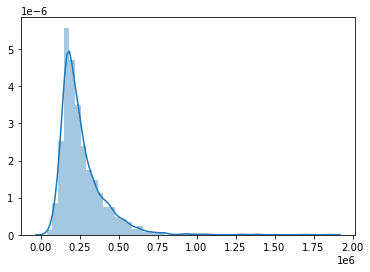

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_df = df.select("LISTPRICE").sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

sns.distplot(pandas_df)
plt.show()

from pyspark.sql.functions import skewness

print(df.agg({"LISTPRICE": "skewness"}).collect())

Checking the distribution visually is a great way to get an idea of what steps will need to be taken before applying a model. We can see the 'ListPrice' is mostly pushed to the left, which means its skewed. We can use the skewness function to verify this numerically rather than visually.

### Using Visualizations: lmplot

Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

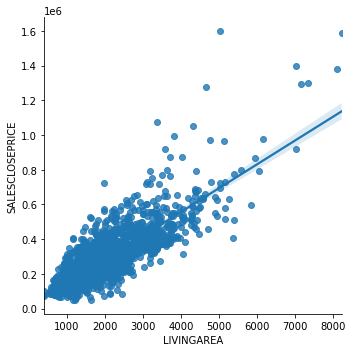

In [38]:
sample_df = df.select(["SALESCLOSEPRICE", "LIVINGAREA"]).sample(False, 0.5, 42)

pandas_df = sample_df.toPandas()
sns.lmplot(x="LIVINGAREA", y="SALESCLOSEPRICE", data=pandas_df)
plt.show()

LivingArea increases, the price of the home increases at a relatively steady rate.

